In [5]:
import networkx as nx
import matplotlib.pyplot as plot
import matplotlib.colors as colors
import networkx.algorithms.bipartite as bi
%matplotlib inline
plot.rcParams['figure.figsize'] = (21, 14)

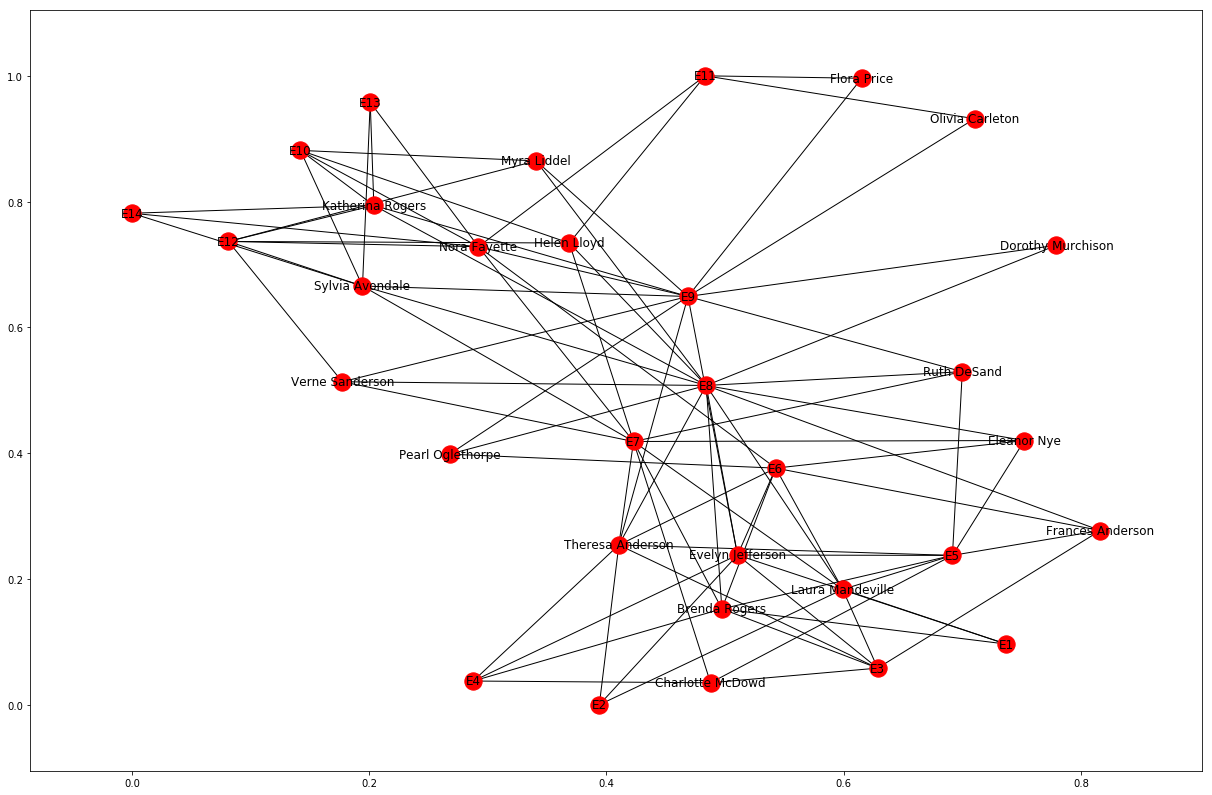

In [2]:
# Create Graph
g = nx.davis_southern_women_graph()
nx.draw_networkx(g)

# Analysis based on women

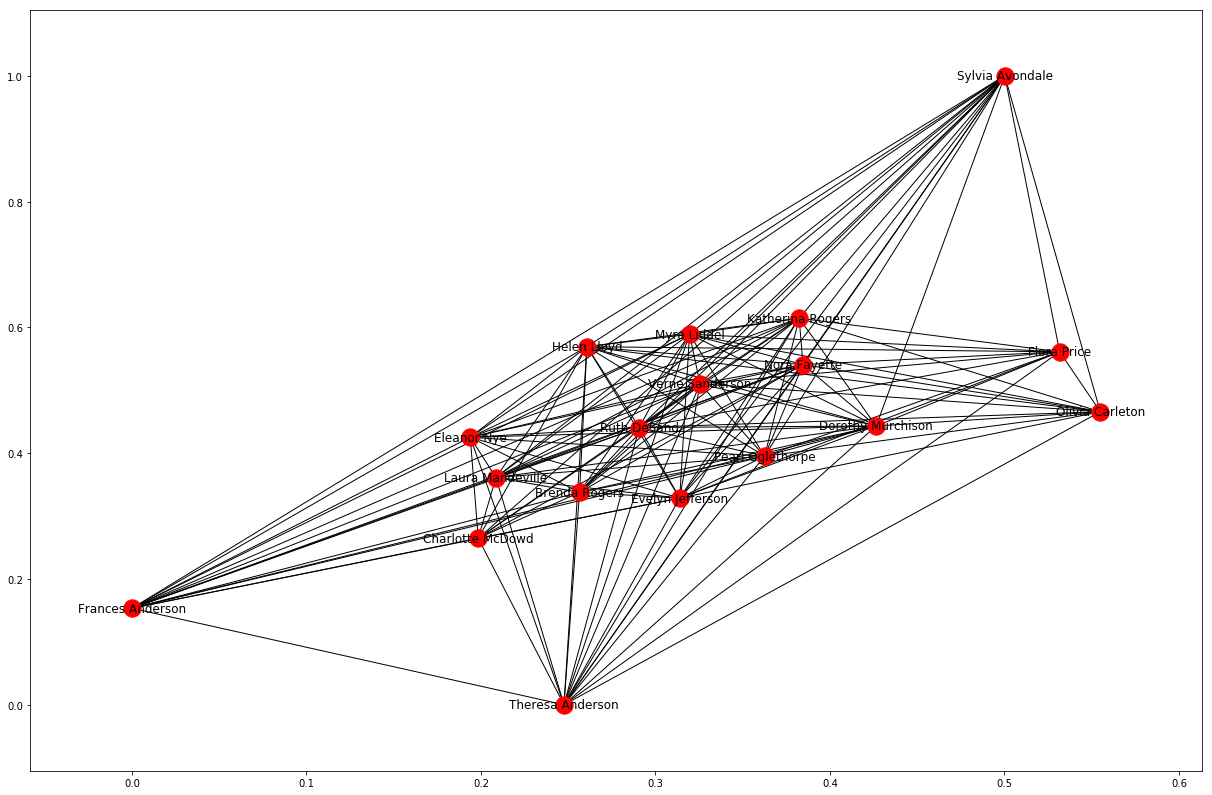

In [40]:
# Project graph onto women node
women = g.graph['top']
event = g.graph['bottom']
w = bi.weighted_projected_graph(g, women,ratio=False)
nx.draw_networkx(w)


In [32]:
w.edges(data=True)[0:5]

[('Evelyn Jefferson', 'Nora Fayette', {'weight': 2}),
 ('Evelyn Jefferson', 'Dorothy Murchison', {'weight': 2}),
 ('Evelyn Jefferson', 'Sylvia Avondale', {'weight': 2}),
 ('Evelyn Jefferson', 'Pearl Oglethorpe', {'weight': 3}),
 ('Evelyn Jefferson', 'Helen Lloyd', {'weight': 1})]

The data is structured to show how much events two women went together. So Evelyn and Nora went two events together

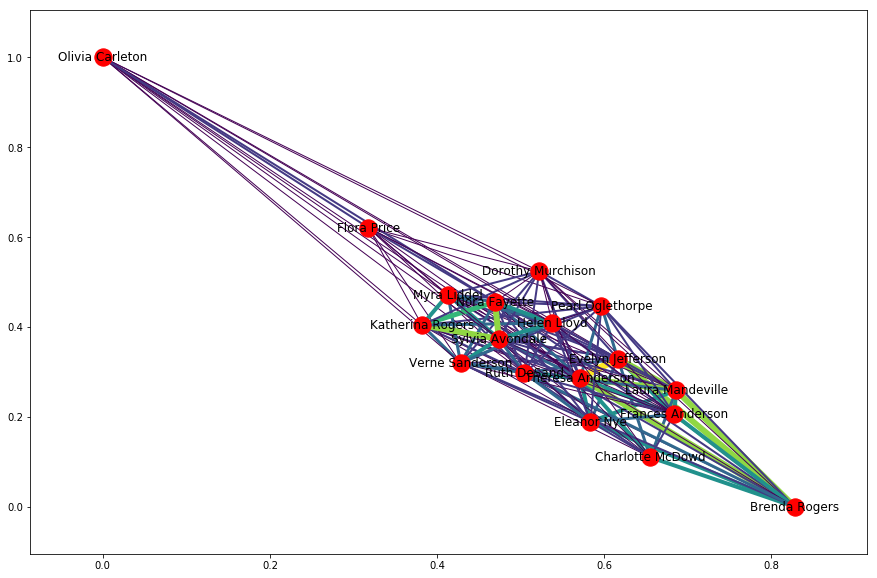

In [24]:
# Create weight to show how much event two women both went
weights = [edata['weight'] for f,t,edata in w.edges(data=True)]
plot.figure(figsize = (15,10))
nx.draw_networkx(w, width=weights, edge_color=weights)


Similar to the printed dataset, from the graph we can see some women went to more event together than others

In [35]:
my_list = [x for x in w.edges(data=True) if x[0] == 'Katherina Rogers' and x[1] == 'Nora Fayette' ]
my_list

[('Katherina Rogers', 'Nora Fayette', {'weight': 5})]

In [25]:
# Calaualte degree centrality
cen= nx.degree_centrality(w)
cen=sorted(zip(cen.values(), cen.keys()), reverse=True)
cen

[(1.0, 'Verne Sanderson'),
 (1.0, 'Theresa Anderson'),
 (1.0, 'Sylvia Avondale'),
 (1.0, 'Ruth DeSand'),
 (1.0, 'Nora Fayette'),
 (1.0, 'Helen Lloyd'),
 (1.0, 'Evelyn Jefferson'),
 (0.9411764705882353, 'Pearl Oglethorpe'),
 (0.9411764705882353, 'Myra Liddel'),
 (0.9411764705882353, 'Katherina Rogers'),
 (0.9411764705882353, 'Dorothy Murchison'),
 (0.8823529411764706, 'Laura Mandeville'),
 (0.8823529411764706, 'Frances Anderson'),
 (0.8823529411764706, 'Eleanor Nye'),
 (0.8823529411764706, 'Brenda Rogers'),
 (0.7058823529411764, 'Olivia Carleton'),
 (0.7058823529411764, 'Flora Price'),
 (0.6470588235294118, 'Charlotte McDowd')]

From the centrality measure, we can see Verne,Theresa and some other women went to event with all other woman in the network at least once 

In [39]:
# Verify degree centrality
my_list1 = [x for x in w.edges(data=True) if x[0] == 'Verne Sanderson' or x[1] == 'Verne Sanderson' ]
my_list2 = [x for x in w.edges(data=True) if x[0] == 'Evelyn Jefferson' or x[1] == 'Evelyn Jefferson' ]
len(my_list1)==len(my_list2)

True

In [36]:
# Calculate betweeness centrality
bet= nx.betweenness_centrality(w)
bet=sorted(zip(bet.values(), bet.keys()), reverse=True)
bet

[(0.010122230710466005, 'Verne Sanderson'),
 (0.010122230710466005, 'Theresa Anderson'),
 (0.010122230710466005, 'Sylvia Avondale'),
 (0.010122230710466005, 'Ruth DeSand'),
 (0.010122230710466005, 'Nora Fayette'),
 (0.010122230710466005, 'Helen Lloyd'),
 (0.010122230710466005, 'Evelyn Jefferson'),
 (0.0053475935828877, 'Pearl Oglethorpe'),
 (0.0053475935828877, 'Myra Liddel'),
 (0.0053475935828877, 'Katherina Rogers'),
 (0.0053475935828877, 'Dorothy Murchison'),
 (0.0026737967914438505, 'Laura Mandeville'),
 (0.0026737967914438505, 'Frances Anderson'),
 (0.0026737967914438505, 'Eleanor Nye'),
 (0.0026737967914438505, 'Brenda Rogers'),
 (0.0, 'Olivia Carleton'),
 (0.0, 'Flora Price'),
 (0.0, 'Charlotte McDowd')]

We see betweeness centrality are all very, so the graph is highly centralized. In addition, we see Olivia, Flora and Charlotte has 0 betweeness centrality which means no two women who had went to events with them had not went to a least one event with each other 

# Analysis based on event

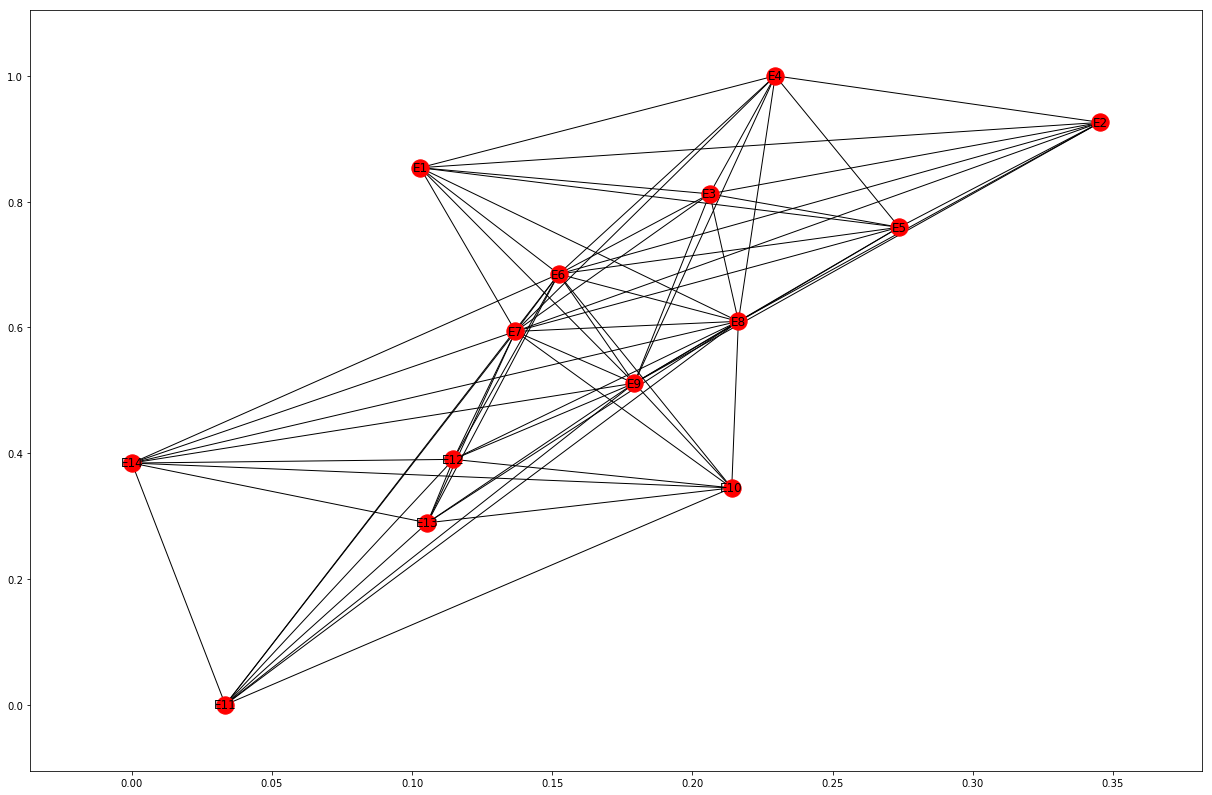

In [18]:
# Create graph project onto event node
e = bi.weighted_projected_graph(g, event,ratio=False)
nx.draw_networkx(e)

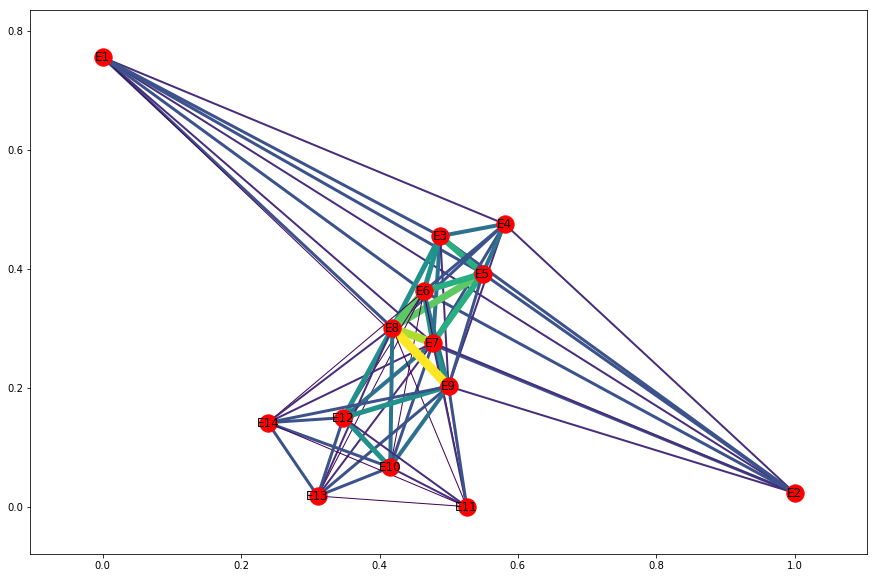

In [28]:
# Create weight to show how much women two event share
weights = [edata['weight'] for f,t,edata in e.edges(data=True)]
plot.figure(figsize = (15,10))
nx.draw_networkx(e, width=weights, edge_color=weights)


We see some event like E8 E9 and some other events are very popular since a lot of women went to both event

In [29]:
# Calculate degree centrality
cen= nx.degree_centrality(e)
cen=sorted(zip(cen.values(), cen.keys()), reverse=True)
cen

[(1.0, 'E9'),
 (1.0, 'E8'),
 (1.0, 'E7'),
 (1.0, 'E6'),
 (0.6153846153846154, 'E5'),
 (0.6153846153846154, 'E4'),
 (0.6153846153846154, 'E3'),
 (0.6153846153846154, 'E2'),
 (0.6153846153846154, 'E14'),
 (0.6153846153846154, 'E13'),
 (0.6153846153846154, 'E12'),
 (0.6153846153846154, 'E11'),
 (0.6153846153846154, 'E10'),
 (0.6153846153846154, 'E1')]

Similar to the gprah, the centrality measure also show E6, E7, E8, E9 are very popular becasue women went to any event also went to these three events. Since no women went to 0 event in this graph. We can concludes that all women went to at least two events   

In [30]:
# Create betweenness centraility 
bet= nx.betweenness_centrality(e)
bet=sorted(zip(bet.values(), bet.keys()), reverse=True)
bet

[(0.08012820512820512, 'E9'),
 (0.08012820512820512, 'E8'),
 (0.08012820512820512, 'E7'),
 (0.08012820512820512, 'E6'),
 (0.0, 'E5'),
 (0.0, 'E4'),
 (0.0, 'E3'),
 (0.0, 'E2'),
 (0.0, 'E14'),
 (0.0, 'E13'),
 (0.0, 'E12'),
 (0.0, 'E11'),
 (0.0, 'E10'),
 (0.0, 'E1')]

We see only four popular event has betweeness measure, which mean there are a lot of tringle relationship between events